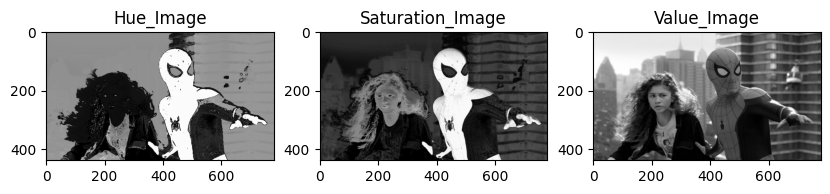

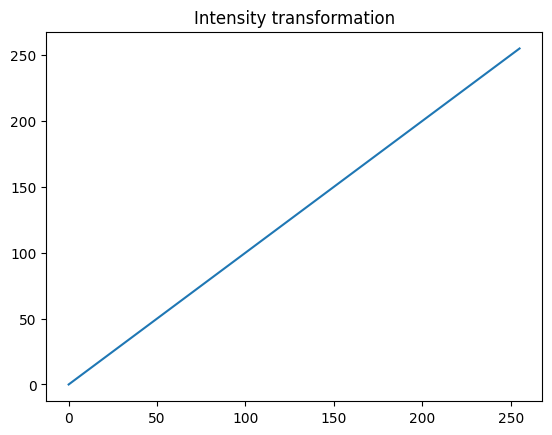

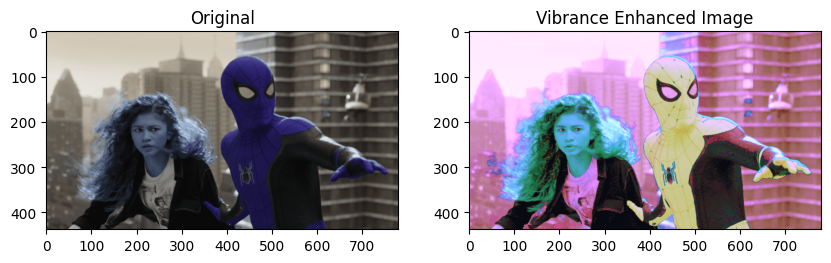

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('IMAGES/spider.png', cv.IMREAD_COLOR)
assert im is not None

im1 = cv.cvtColor(im, cv.COLOR_BGR2HSV)
hue_img,sat_img,val_img = cv.split(im1)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(hue_img, cmap="gray")
ax[0].set_title('Hue_Image')
ax[1].imshow(sat_img, cmap="gray")
ax[1].set_title('Saturation_Image')
ax[2].imshow(val_img, cmap="gray")
ax[2].set_title('Value_Image')
plt.show()

x= np.arange(0, 256).astype('uint8')
a = 0.2
sigma = 70
F = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))/128), 255).astype('uint8')
image_transform = cv.LUT(sat_img, F)
plt.title('Intensity transformation')
plt.plot(F)
plt.show()

new = cv.merge([hue_img,image_transform,val_img])
result =  cv.cvtColor(new,  cv.COLOR_HSV2BGR)
added = cv.add(new, im)

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(added, cmap="gray")
ax[1].set_title('Vibrance Enhanced Image')

plt.show()